#Background

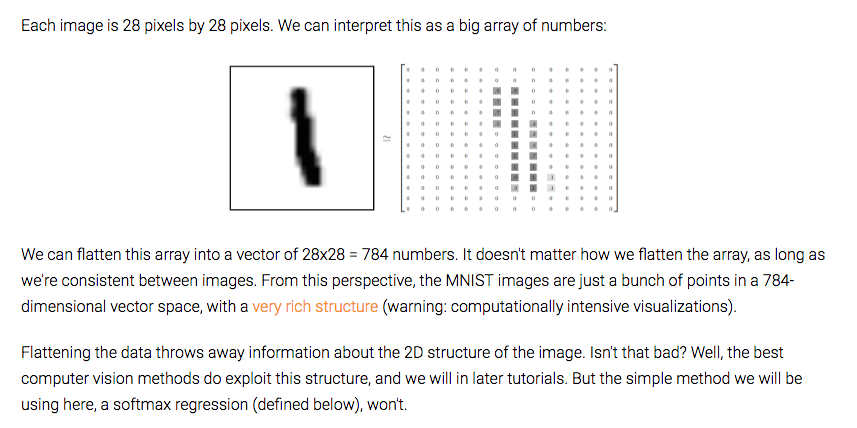

In [8]:
# Test trained model
from IPython.display import Image
Image(filename='mnist1.png')

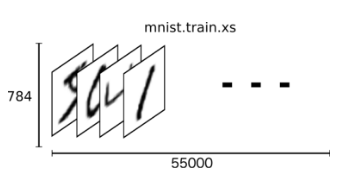

In [9]:
Image(filename='mnist2.png')

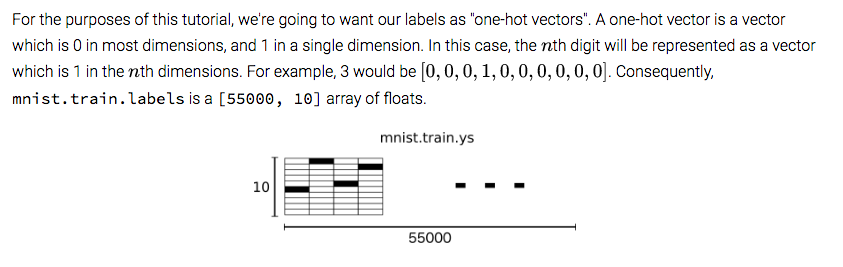

In [10]:
Image(filename='mnist3.png')

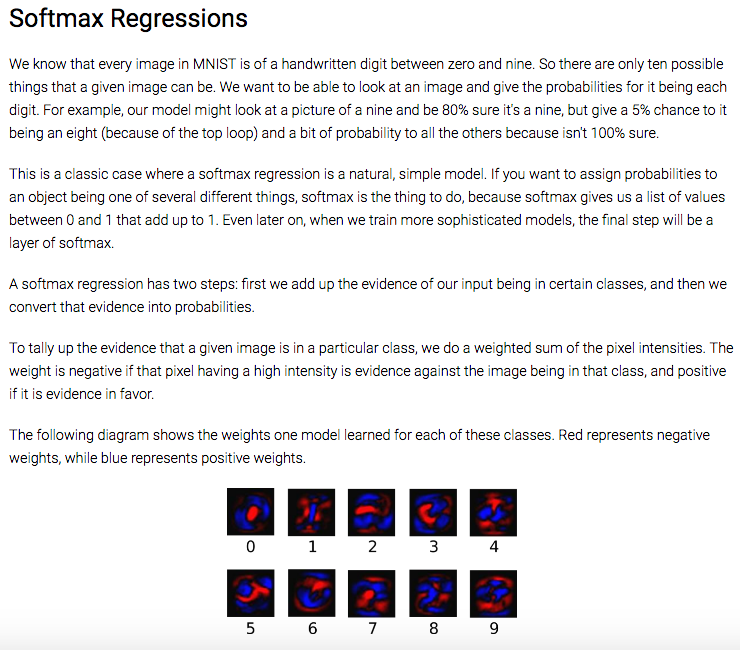

In [11]:
Image(filename='mnist4.png')

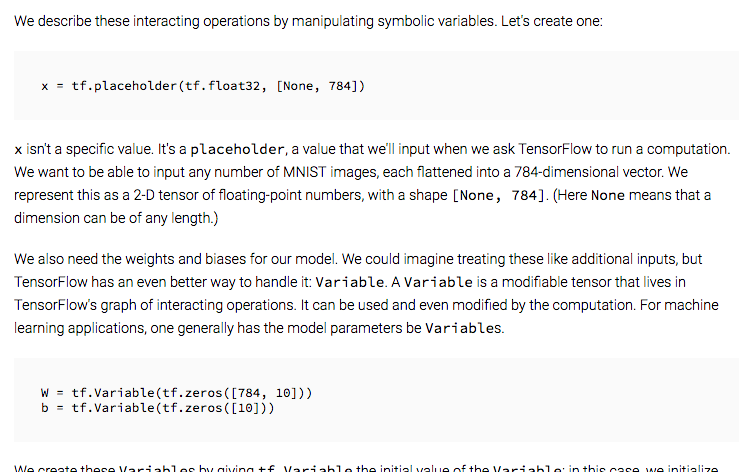

In [12]:
Image(filename='mnist5.png')

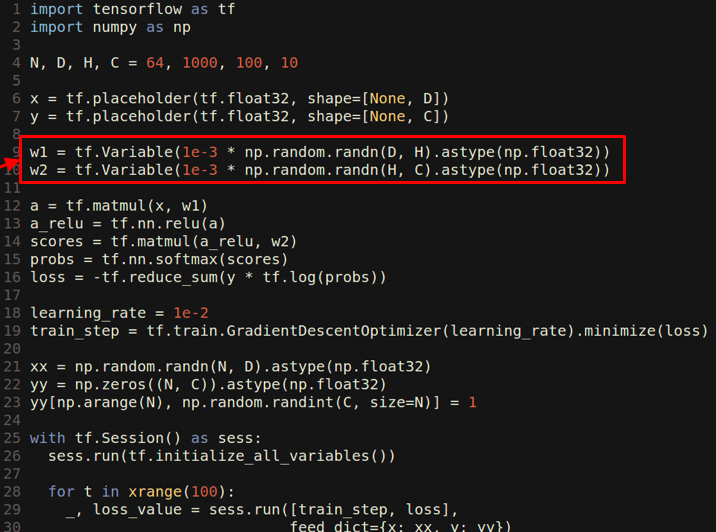

In [16]:
Image(filename='tf.png')

In [1]:
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function

# Import data
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

In [2]:
flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')

mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

sess = tf.InteractiveSession()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
# Create the model
size = 100

x = tf.placeholder(tf.float32, [None, 784])
#W = tf.Variable(tf.random_normal([784, size]), stddev=0.001)\
W = tf.Variable( tf.random_normal( [784, size], stddev=0.001 ))

#W2 = tf.Variable(tf.random_normal([size, 10]), stddev=0.001)
W2 = tf.Variable( tf.random_normal( [size, 10], stddev=0.001 ))
b = tf.Variable(tf.ones([size]))
b2 = tf.Variable(tf.ones([10]))

###
a = tf.matmul(x,W) + b
a_relu = tf.nn.relu(a)
scores = tf.matmul(a_relu,W2) + b2
###
y = tf.nn.softmax(scores)

#y = tf.nn.softmax(tf.matmul(scores, W) + b)







In [4]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [9]:
# Train
accuracies = []

tf.initialize_all_variables().run()
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    train_step.run({x: batch_xs, y_: batch_ys})
    
    #Getting Accuracy
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracies.append(accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

In [11]:
accuracies[:10]

[0.101,
 0.1135,
 0.1032,
 0.1032,
 0.1032,
 0.095200002,
 0.094800003,
 0.094800003,
 0.094700001,
 0.097099997]

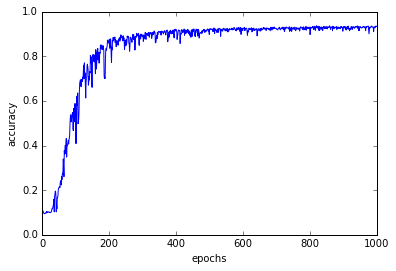

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(accuracies)
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.gca()